## Initialization for Training and Analysis

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

import os, re, json, time, copy, csv, glob, itertools, pickle, warnings, shutil

import numpy as np
from numpy import genfromtxt
import seaborn as sns
import pandas as pd
from pandas.tools.plotting import table
pd.options.display.max_columns = 100

import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)
from pathlib import Path

import helper as ksn

In [2]:
datasets = 'D1-IsolatedNetworkPassiveDFP'
datasets = 'D21-CampusNetworkActiveDFP'
datasets = 'D22-CampusNetworkPassiveDFP'

In [3]:
home = Path.home()
#data_folder = 'datasets'
data_folder = os.path.join(home, 'N', 'fingerprinting', datasets)
out_folder = 'r_' + datasets

sample = 'no'
sample_size = 5
batch = 64
epochs = 20

f1 = os.path.join(out_folder, 'results_training.pkl')
f2 = os.path.join(out_folder, 'results_testing.pkl')
f3 = os.path.join(out_folder, 'data.pkl')

if sample == 'yes':
    epochs = 2
data_dirs = [os.path.join(data_folder, i) for i in sorted(os.listdir(data_folder)) if not i.startswith('.')]
Loss, Accuracy, Time = 0, 1, 2
print(data_dirs)

['/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive_ID', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Udp_Case1_Passeive_ID', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Udp_Case1_Passive', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Udp_Case3_Passive', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Udp_Case3_Passive_ID', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Udp_Case4_Passive', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Udp_Case4_Passive_ID', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Ping_Icmp_Case1_Passive', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Ping_Icmp_Case1_Passive_ID', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Ping_Icmp_Case2_Passive', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Ping_Icmp_Case2_Passive_I

## Analysis

In [4]:
print('Selecte dataset to analyse')
print([(dr.split('/')[-1], idx) for idx, dr in enumerate(data_dirs)])
with open(f1, 'rb') as f:
    results_training = pickle.load(f)

with open(f2, 'rb') as f:
    results_testing = pickle.load(f)

Selecte dataset to analyse
[('Iperf_Tcp_Case1_Passive', 0), ('Iperf_Tcp_Case1_Passive_ID', 1), ('Iperf_Udp_Case1_Passeive_ID', 2), ('Iperf_Udp_Case1_Passive', 3), ('Iperf_Udp_Case3_Passive', 4), ('Iperf_Udp_Case3_Passive_ID', 5), ('Iperf_Udp_Case4_Passive', 6), ('Iperf_Udp_Case4_Passive_ID', 7), ('Ping_Icmp_Case1_Passive', 8), ('Ping_Icmp_Case1_Passive_ID', 9), ('Ping_Icmp_Case2_Passive', 10), ('Ping_Icmp_Case2_Passive_ID', 11), ('Scp_Tcp_Case1_Passive', 12), ('Scp_Tcp_Case1_Passive_ID', 13)]


In [ ]:
'''
results_training_new = dict()
for k in results_training.keys():
    new_k = k.replace('datasetsN', 'D22-CampusNetworkPassiveDFP')
    results_training_new[new_k] = results_training[k]
results_training = results_training_new
'''

In [ ]:
'''
results_testing_new = dict()
for k in results_testing.keys():
    new_k = k.replace('datasetsN', 'D22-CampusNetworkPassiveDFP')
    results_testing_new[new_k] = results_testing[k]
results_testing = results_testing_new
'''

/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive


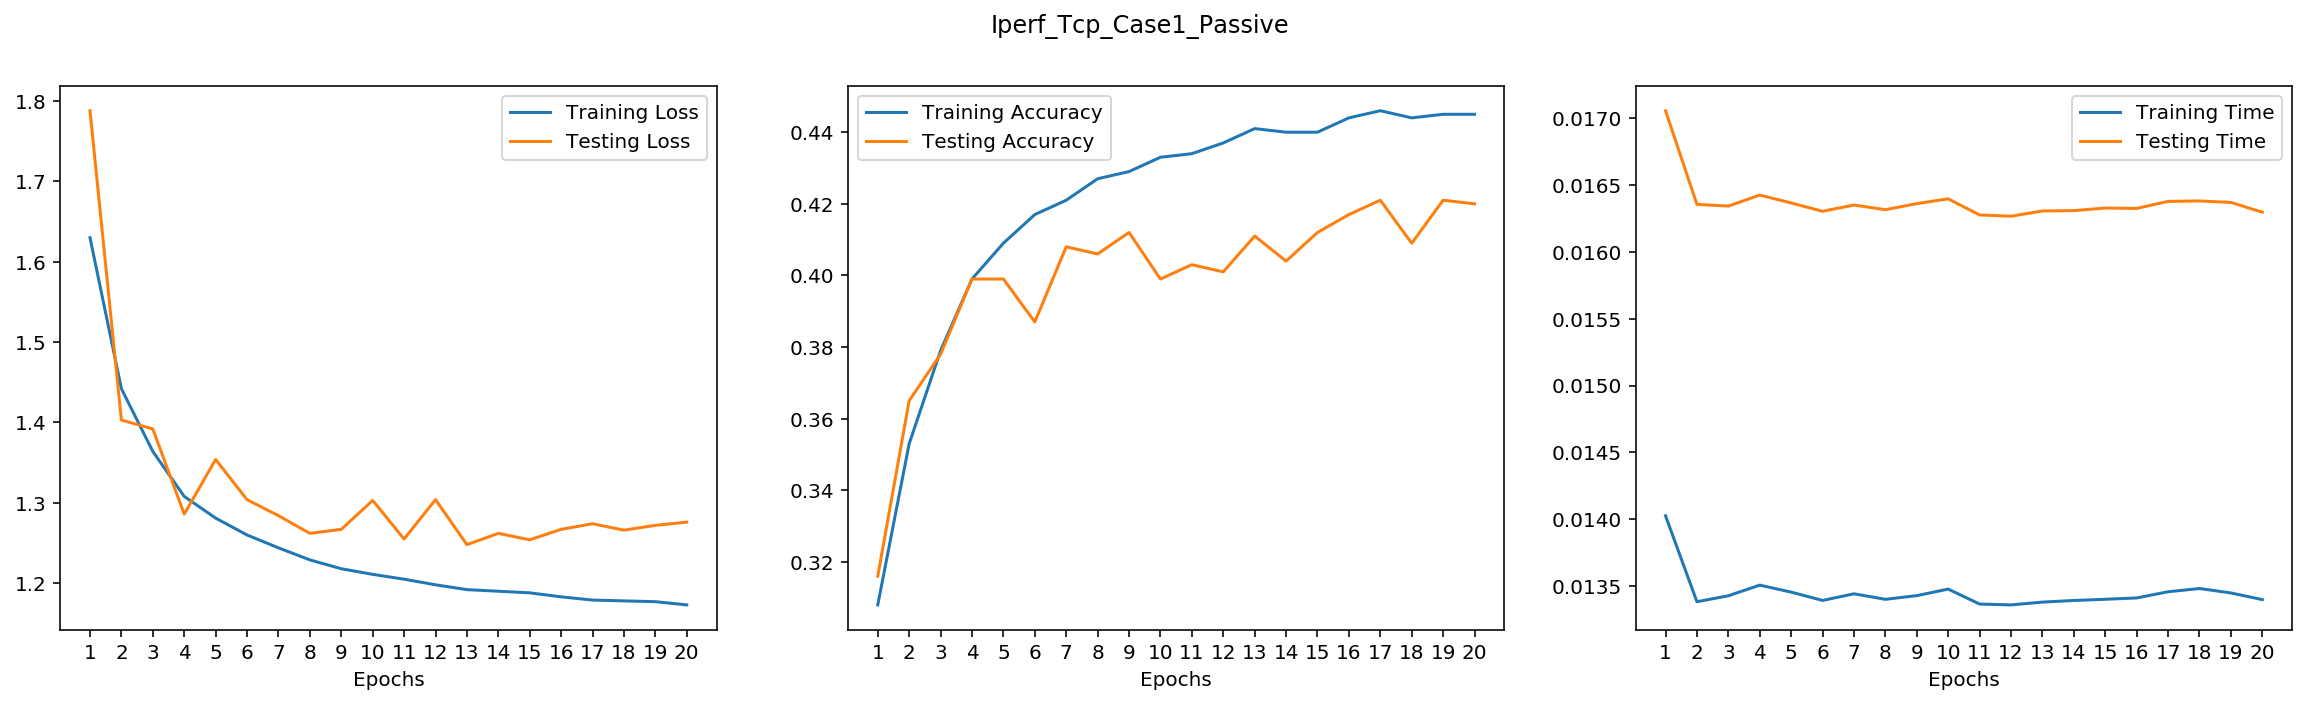

In [8]:
s_idx = 0
graph_dataset = data_dirs[s_idx]
print(graph_dataset)
folders = sorted(os.listdir(os.path.join(data_dirs[s_idx], 'testing')))
folders = [os.path.join(data_dirs[s_idx], 'testing', fd) for fd in folders]
nfiles = 0
for fd in folders:
    files = os.listdir(fd)
    #print('Folder {} Files {}'.format(fd, len(files)))
    nfiles += len(files)
training_loss, testing_loss = results_training[graph_dataset][Loss], results_testing[graph_dataset][Loss]
training_accuracy, testing_accuracy = results_training[graph_dataset][Accuracy], results_testing[graph_dataset][Accuracy]
training_time, testing_time = results_training[graph_dataset][Time], results_testing[graph_dataset][Time]
#print(training_loss, testing_loss, training_accuracy, testing_accuracy, training_time, testing_time)
newtesting_time = np.divide(testing_time, nfiles)
newtraining_time = np.divide(training_time, nfiles)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

x = np.arange(1,epochs+1)

ax = ax1
ax.plot(x, training_loss, label='Training Loss'), ax.plot(x, testing_loss, label='Testing Loss')
ax.set_xticks(x) #ax.set_ylim(0, 0.8) 
ax.legend()
ax.set_xlabel('Epochs')

ax = ax2
ax.plot(x, training_accuracy, label='Training Accuracy'), ax.plot(x, testing_accuracy, label='Testing Accuracy')
ax.set_xticks(x) # ax.set_ylim(0.6, 1.1), 
ax.legend(), ax.set_xlabel('Epochs')

ax = ax3
ax.plot(x, newtraining_time, label='Training Time'), ax.plot(x, newtesting_time, label='Testing Time')
ax.set_xticks(x) #ax.set_ylim(10, 1800)
ax.legend(), ax.set_xlabel('Epochs');

graph_dataset = graph_dataset.split('/')[-1]
fig.suptitle(graph_dataset)
fig.savefig('results/'+graph_dataset + '.png')

In [9]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

['Iperf_Tcp_Case1_Passive', 'Iperf_Tcp_Case1_Passive_ID', 'Iperf_Udp_Case1_Passeive_ID', 'Iperf_Udp_Case1_Passive', 'Iperf_Udp_Case3_Passive', 'Iperf_Udp_Case3_Passive_ID', 'Iperf_Udp_Case4_Passive', 'Iperf_Udp_Case4_Passive_ID', 'Ping_Icmp_Case1_Passive', 'Ping_Icmp_Case1_Passive_ID', 'Ping_Icmp_Case2_Passive', 'Ping_Icmp_Case2_Passive_ID', 'Scp_Tcp_Case1_Passive', 'Scp_Tcp_Case1_Passive_ID']
[0.446, 0.173, 0.238, 0.513, 0.405, 0.143, 0.506, 0.19, 0.436, 0.151, 0.45, 0.154, 0.567, 0.208]
[0.421, 0.165, 0.236, 0.516, 0.424, 0.181, 0.505, 0.211, 0.463, 0.215, 0.471, 0.185, 0.573, 0.194]


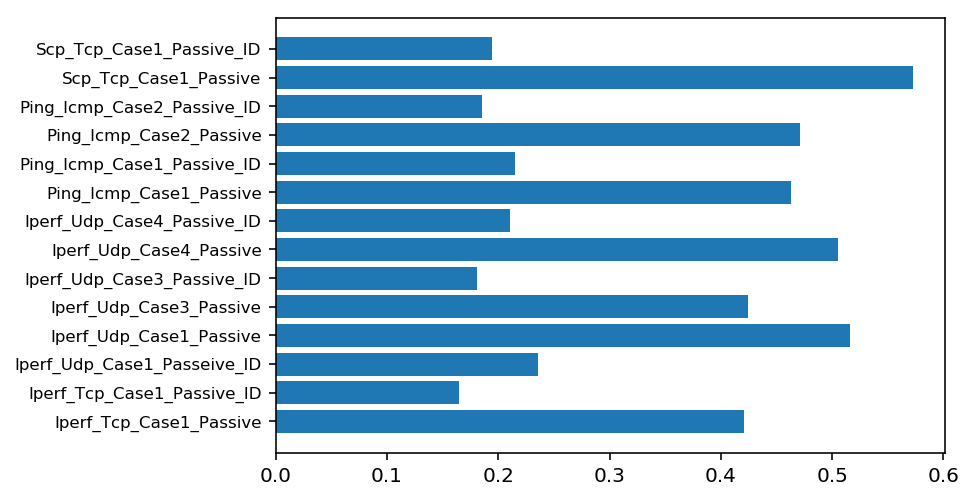

In [10]:
selected = [idx for idx, dr in enumerate(data_dirs) if ('Pass' in dr)]
#selected = [0,1]
#print(selected)
names_b, train_b, test_b = [],[],[]
for s_idx in selected:
    graph_dataset = data_dirs[s_idx]

    training_loss, testing_loss = results_training[graph_dataset][Loss], results_testing[graph_dataset][Loss]
    training_accuracy, testing_accuracy = results_training[graph_dataset][Accuracy], results_testing[graph_dataset][Accuracy]
    training_time, testing_time = results_training[graph_dataset][Time], results_testing[graph_dataset][Time]
    best_training_accuracy, best_testing_accuracy = max(results_training[graph_dataset][Accuracy]), max(results_testing[graph_dataset][Accuracy])
    #print(graph_dataset, best_training_accuracy, best_testing_accuracy)
    names_b.append(graph_dataset.split('/')[-1])
    train_b.append(best_training_accuracy)
    test_b.append(best_testing_accuracy)
print(names_b)
print(train_b)
print(test_b)
barplot = plt.barh(y= range(len(test_b)), width=test_b)
autolabel(barplot)
plt.yticks(range(len(names_b)), names_b, size='small');

In [11]:
s_idx = 0
graph_dataset = data_dirs[s_idx]
training_loss, testing_loss = results_training[graph_dataset][Loss], results_testing[graph_dataset][Loss]
training_accuracy, testing_accuracy = results_training[graph_dataset][Accuracy], results_testing[graph_dataset][Accuracy]
training_time, testing_time = results_training[graph_dataset][Time], results_testing[graph_dataset][Time]
avg_training_accuracy, avg_testing_accuracy = np.mean(results_training[graph_dataset][Accuracy]),np.mean(results_testing[graph_dataset][Accuracy])
print (avg_training_accuracy, avg_testing_accuracy)

0.41955 0.39940000000000003


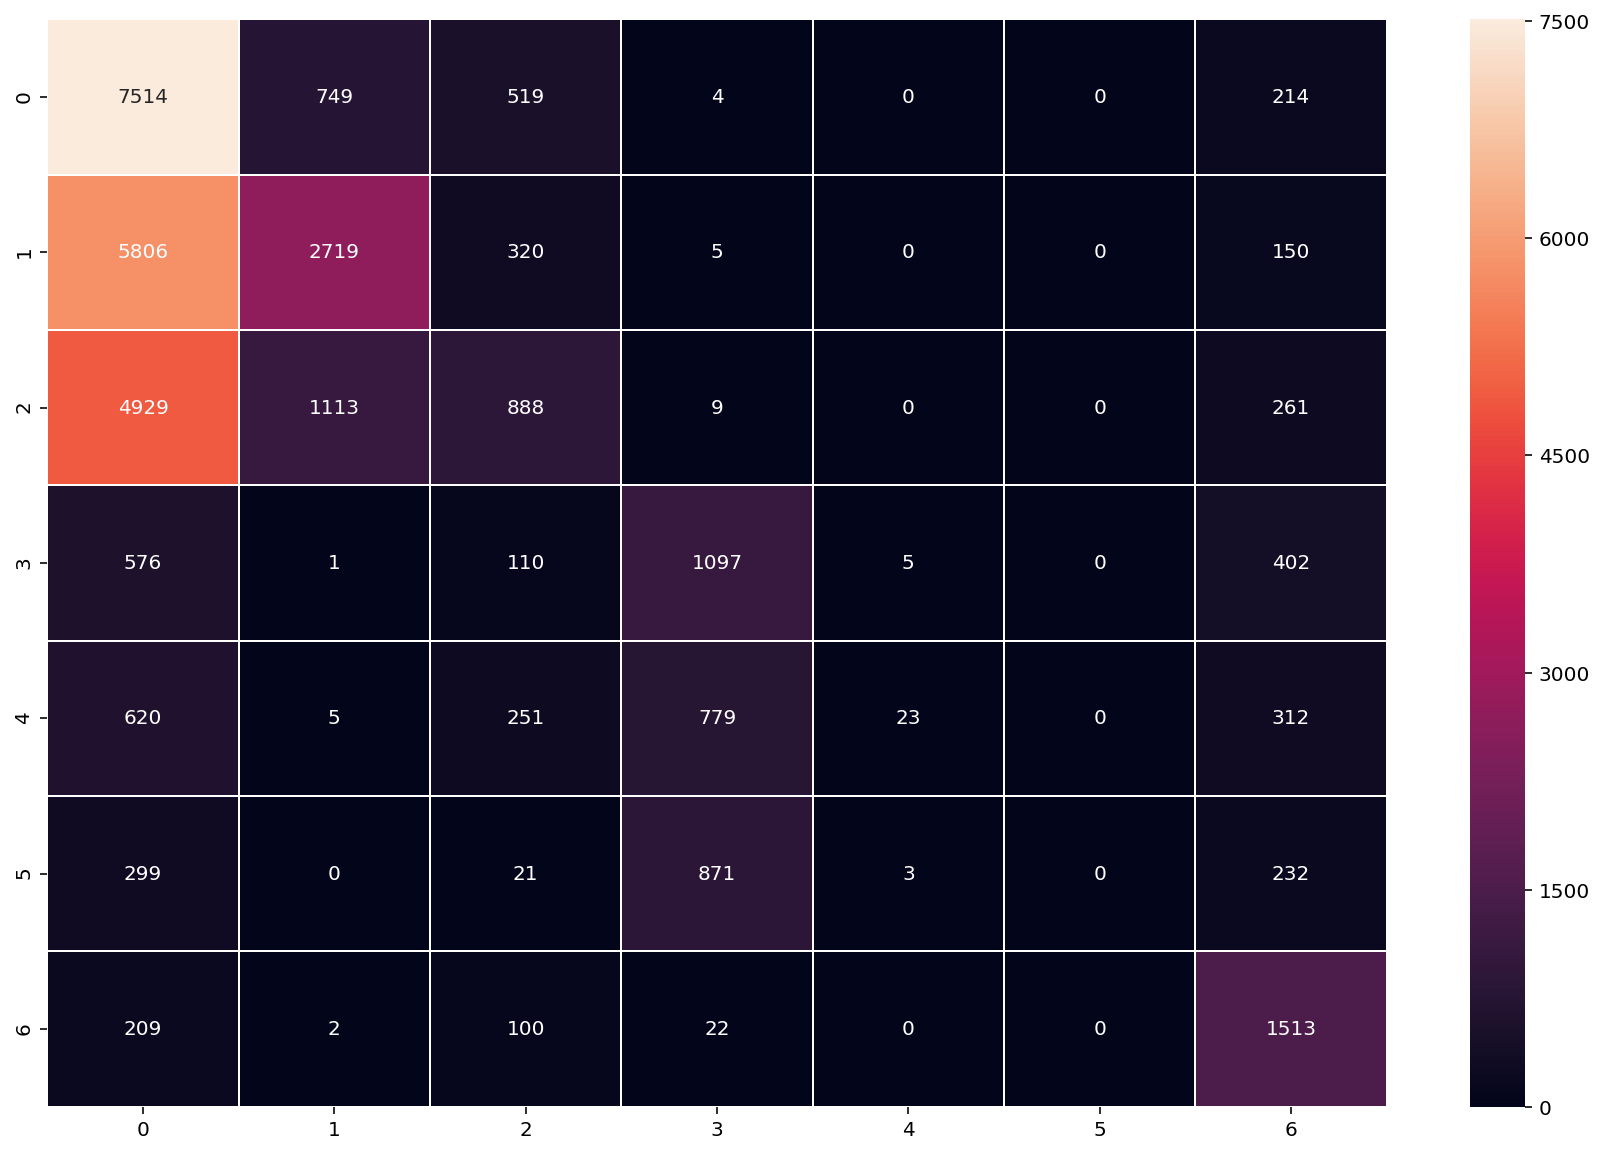

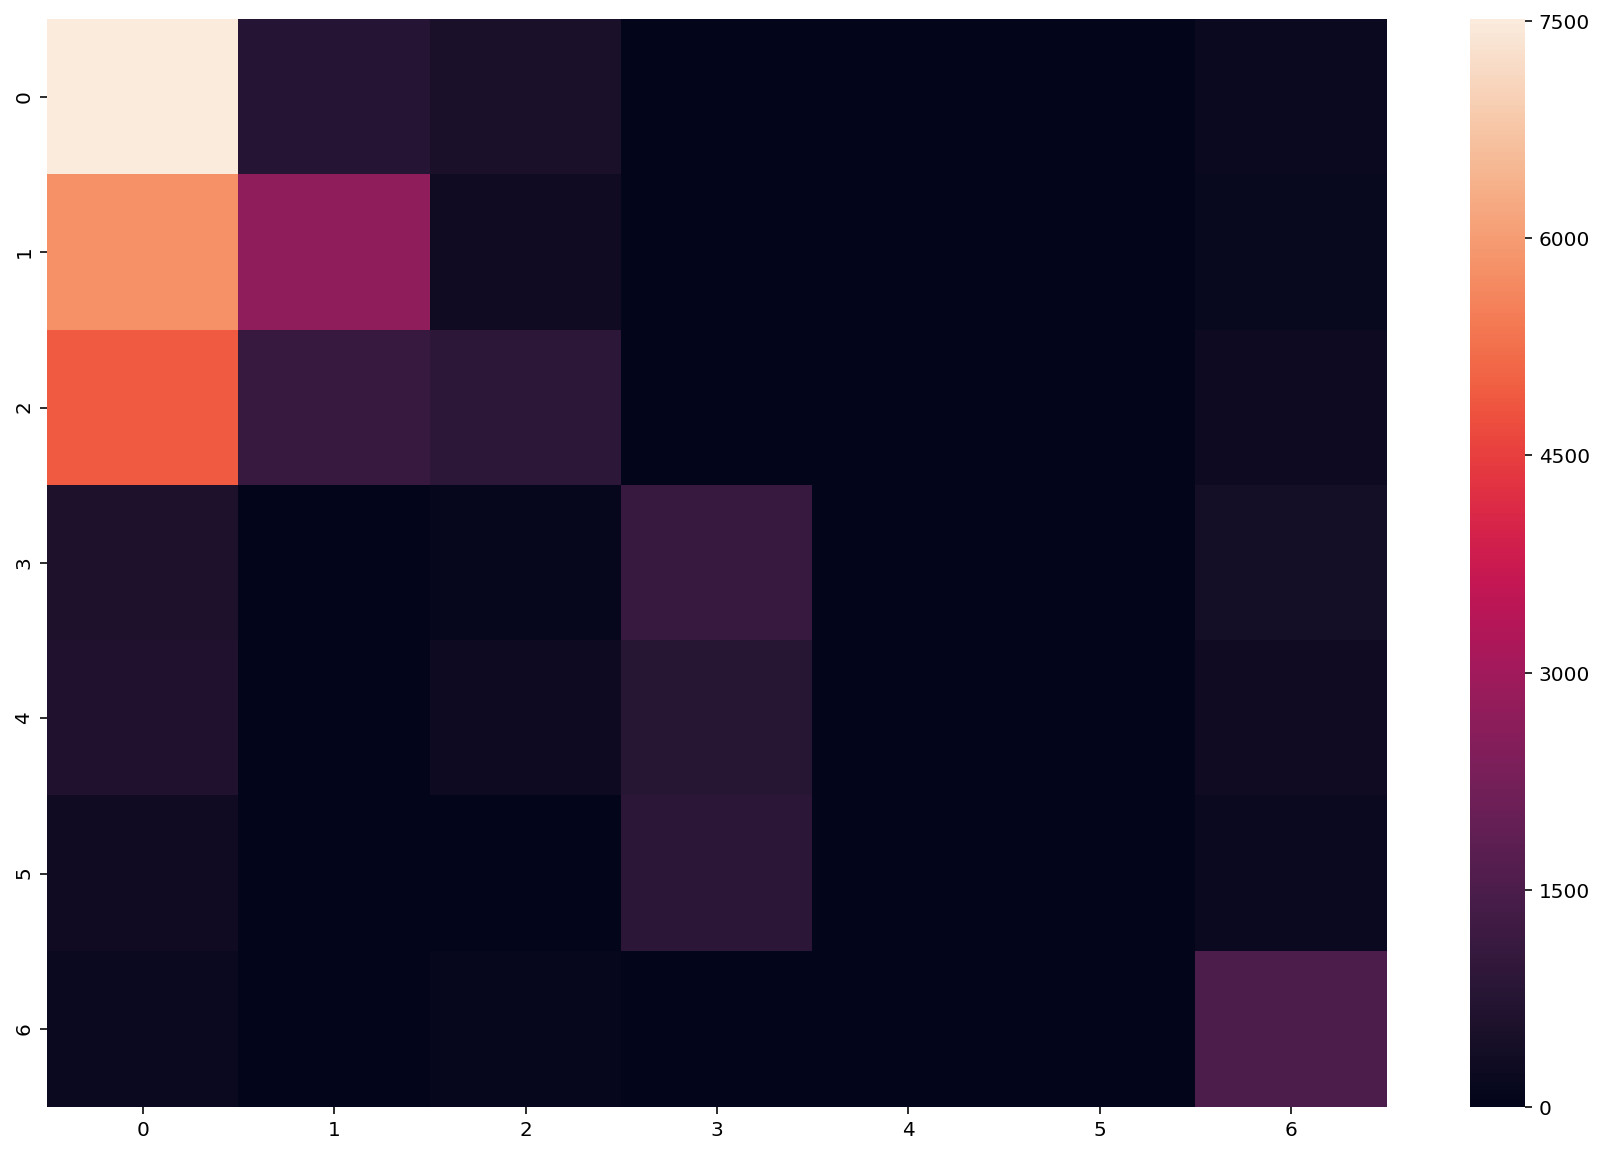

In [12]:
s_idx = 0
nfiles, nrows, df = ksn.conf_mat(out_folder, data_dirs[s_idx])
 
ksn.heat_map1(df)
ksn.heat_map2(df)

In [13]:
import json
from pprint import pprint
file = data_dirs[s_idx]+ '/cat_to_name.json'
with open(file) as data_file:
        data_item = json.load(data_file)
pprint(data_item)

{'1': 'AcerNetbook',
 '2': 'AsusNetbook',
 '3': 'GatewayNetbook',
 '4': 'GooglePhone',
 '5': 'Laptop',
 '6': 'Tablet',
 '7': 'eReader'}


In [14]:
df[df.eq(0)] = ''
df

,0,1,2,3,4,5,6
0,7514,749,519,4,,,214
1,5806,2719,320,5,,,150
2,4929,1113,888,9,,,261
3,576,1,110,1097,5,,402
4,620,5,251,779,23,,312
5,299,,21,871,3,,232
6,209,2,100,22,,,1513


In [15]:
#Recall 
mat = df.as_matrix()
mat [mat[:]=='']=0
np.diag(mat)/(np.diag(mat)+np.sum(mat, axis=1)-np.diag(mat))


array([0.8348888888888889, 0.3021111111111111, 0.12333333333333334,
       0.5006846188954815, 0.011557788944723618, 0.0, 0.8196099674972914],
      dtype=object)

In [16]:
#Accuracy 
mat = df.as_matrix()
mat [mat[:]=='']=0
mat1 =np.sum(np.diag(mat))/(np.sum(np.diag(mat))+np.sum(mat, axis=0)+np.sum(mat, axis=1) -2*np.diag(mat))
print(mat1)
sum(mat1)/len(mat1)

[0.4969110155713718 0.627893175074184 0.6431009491747323
 0.8316604184302818 0.8744357556106555 0.906060606060606 0.878400817473496]


0.7512089624850468

In [17]:
print(data_folder)
print(data_dirs[s_idx])
str=data_dirs[s_idx] + '/testing'
print(str)

/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP
/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive
/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing


In [18]:
len(glob.glob(os.path.join(data_dirs[s_idx], 'training', '*', '*.png'))) + len(glob.glob(os.path.join(data_dirs[s_idx], 'testing', '*', '*.png')))

163260

In [19]:
print(data_dirs[s_idx])
print(nfiles)
print(nrows)
print(len(glob.glob(os.path.join(data_dirs[s_idx], 'testing', '*', '*.png'))))
folders = sorted(os.listdir(os.path.join(data_dirs[s_idx], 'testing')))
print(folders)
folders = [os.path.join(data_dirs[s_idx], 'testing', fd) for fd in folders]
print(folders)
nfiles = 0
for fd in folders:
    files = os.listdir(fd)
    print('Folder {} Files {}'.format(fd, len(files)))
    nfiles += len(files)
print('Total Files are {}'.format(nfiles))

/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive
32653
32653
32653
['1', '2', '3', '4', '5', '6', '7']
['/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/1', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/2', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/3', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/4', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/5', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/6', '/home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/7']
Folder /home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/1 Files 9000
Folder /home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/2 Files 9000
Folder /

Folder /home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/1 Files 9000
Folder /home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/2 Files 9000
Folder /home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/3 Files 7200
Folder /home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/4 Files 2191
Folder /home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/5 Files 1990
Folder /home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/6 Files 1426
Folder /home/ksn/N/fingerprinting/D22-CampusNetworkPassiveDFP/Iperf_Tcp_Case1_Passive/testing/7 Files 1846
Total Files are 32653
20
20


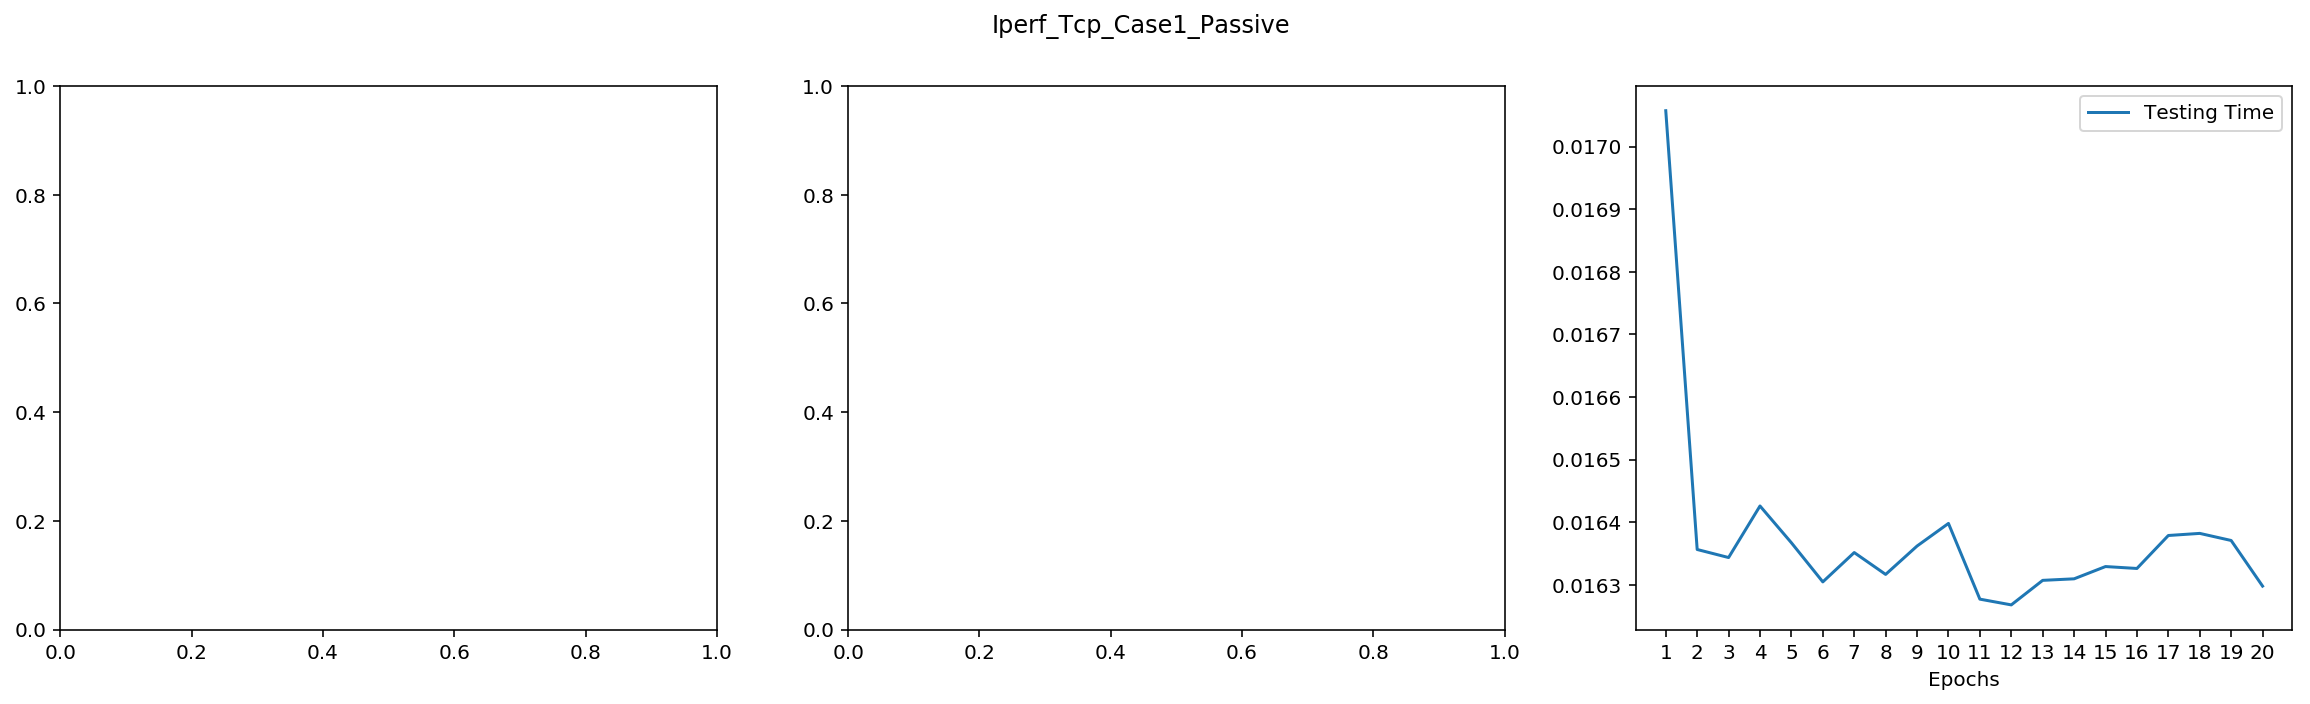

In [20]:
s_idx = 0
graph_dataset = data_dirs[s_idx]
#print(graph_dataset)
folders = sorted(os.listdir(os.path.join(data_dirs[s_idx], 'testing')))
#print(folders)
folders = [os.path.join(data_dirs[s_idx], 'testing', fd) for fd in folders]
#print(folders)
nfiles = 0
for fd in folders:
    files = os.listdir(fd)
    print('Folder {} Files {}'.format(fd, len(files)))
    nfiles += len(files)
print('Total Files are {}'.format(nfiles))
training_loss, testing_loss = results_training[graph_dataset][Loss], results_testing[graph_dataset][Loss]
training_accuracy, testing_accuracy = results_training[graph_dataset][Accuracy], results_testing[graph_dataset][Accuracy]
training_time, testing_time = results_training[graph_dataset][Time], results_testing[graph_dataset][Time]
#print(training_loss, testing_loss, training_accuracy, testing_accuracy, training_time, testing_time)
print(len(testing_time))
#for fd in len(testing_time):
#testing_time[:] = testing_time[:]/ 9821  
newtesting_time = np.divide(testing_time, nfiles)
print(len(newtesting_time))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

x = np.arange(1,epochs+1)

ax = ax3
ax.plot(x, newtesting_time, label='Testing Time')
ax.set_xticks(x) #ax.set_ylim(10, 1800)
ax.legend(), ax.set_xlabel('Epochs');

graph_dataset = graph_dataset.split('/')[-1]
fig.suptitle(graph_dataset)
fig.savefig('results/'+graph_dataset + '.png')

In [21]:
data = dict()
for data_dir in data_dirs:
    n_files = []
    n_files.append(len(os.listdir(os.path.join(data_dir, 'training'))))
    n_files.append(len(glob.glob(os.path.join(data_dir, 'training' , '*', '*.png'))))
    n_files.append(len(os.listdir(os.path.join(data_dir, 'testing'))))
    n_files.append(len(glob.glob(os.path.join(data_dir, 'testing' , '*', '*.png'))))
    data[data_dir] = n_files
print('Total Datasets are {}'.format(len(data_dirs)))
#print(data)

Total Datasets are 14


In [22]:
with open(f1, 'wb') as f:
    pickle.dump(results_training, f, pickle.HIGHEST_PROTOCOL)

with open(f2, 'wb') as f:
    pickle.dump(results_testing, f, pickle.HIGHEST_PROTOCOL)

with open(f3, 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)